#Recognizing Handwritten Digits
A pretty simple (and lowkey unoriginal) personal project to learn the basics of machine learning and Pytorch

---------------------------------
By Carlos Lopez

Data gotten from the MNIST database:
(http://yann.lecun.com/exdb/mnist/)

Learning and inspiration mainly derived from these sources:

(https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

(https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&ab_channel=sentdex)

(https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&ab_channel=3Blue1Brown)



# Installation and Imports
Install Torchvision and Pytorch

In [2]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

  ERROR: HTTP error 403 while getting http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl
  ERROR: Could not install requirement torch==1.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl because of error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl
ERROR: Could not install requirement torch==1.3.1.post4 from http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl because of HTTP error 403 Client Error: Forbidden for url: http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl for URL http://download.pytorch.org/whl/cu80/torch-1.3.1.post4-cp36-cp36m-linux_x86_64.whl


Import libraries into project

In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms, datasets


#Data Preparation

Download MNIST from torch, split into train and test, and convert to Tensor (1 by $\lambda$ matrix) 

($\lambda$ is
784 in this case because image is 28x28)

In [4]:
train_set = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test_set = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Split data into batches and load it into the neural network
Turn data into variables that torch can actually use

In [5]:
TrainSet = torch.utils.data.DataLoader(train_set, batch_size= 10, shuffle =True)
TestSet = torch.utils.data.DataLoader(test_set, batch_size= 10, shuffle =True)

Verifier just to see that data was loaded in correctly

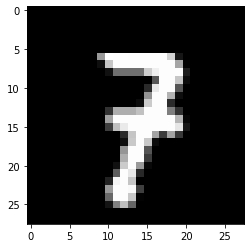

In [24]:
for data in TrainSet:
  #Print out the Tensor
  #print(data)
  break
#Display Image of Handwritten Number
plt.imshow(data[0][0].view(28,28), cmap = 'gray')
plt.show()

# The neural network
Import neural network tools from torch

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Create the actual Neural Network 
(4 layers, relu function)

In [8]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64) #input, output where 784 = 28*28 and 64 is input of next layer
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1) #cuz we want a distribution
net = Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Pass a randomly generated image just to see if neural network works

In [14]:
X=torch.rand((28,28))
X = X.view(1,28*28)
output = net(X)
print(output)

tensor([[ -8.4966, -10.4053,  -9.2452,  -6.4933, -10.6203,  -0.0334,  -5.8037,
         -11.7944,  -3.5794,  -9.7527]], grad_fn=<LogSoftmaxBackward>)


Actually Train and Optimize Neural Network on the data we prepared earlier

In [21]:


optimizer = optim.Adam(net.parameters(), lr =.001)

EPOCHS = 3  #amount of times went over all data 
for epoch in range(EPOCHS):
  for data in TrainSet:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) #use  mean squared error if one hot vector else this
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0608, grad_fn=<NllLossBackward>)
tensor(0.5547, grad_fn=<NllLossBackward>)
tensor(0.0349, grad_fn=<NllLossBackward>)


Measure the accuracy of the model and print it out

In [11]:
correct = 0
total = 0

with torch.no_grad():
  for data in TrainSet:
    X, y = data 
    output = net(X.view(-1, 28*28))
    for idx, i in  enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total +=1
print("Accuracy:", round(correct/total, 3))

Accuracy: 0.979


In [12]:
with torch.no_grad():
  X, y = data 
  output = net(X.view(-1, 28*28))
  for idx, i in enumerate(output):
    print (torch.argmax(i))


tensor(3)
tensor(7)
tensor(4)
tensor(2)
tensor(7)
tensor(9)
tensor(7)
tensor(9)
tensor(0)
tensor(8)


tensor(7)


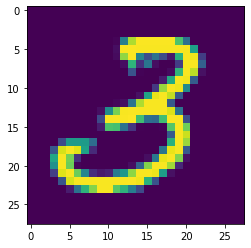

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show
print(torch.argmax(net(X[1].view(-1,784))[0]))